In [8]:
# this is basically a rerun of the EDA i did initially, but on the new data
# I am doing this now because I will include the EDA on the new data in my final report, but I didnt want to
# delete my old work from previously. I did not redo the EDA on the new data when I got it, as the results
# will be much the same. This is just being done now so that the report is perfect. 

import pandas as pd

full_df = pd.read_csv('../data/full_df-0.csv')


#basic characteristics 
full_df_chars = full_df.drop(columns=['x-axis', 'y-axis', 'ice_mask'], inplace=False)
full_df_chars.describe()


,precipitation,air_temp,ocean_temp,ice_velocity,ice_thickness
count,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000
mean,492.847577,254.383848,272.871865,35.630226,785.948573
std,351.946762,17.431594,1.014827,201.272326,1165.304012
min,-26.345100,214.175415,271.249695,-1.000000,0.000000
25%,148.012894,241.369202,272.128540,-1.000000,0.000000
50%,500.870361,263.044708,272.672302,-1.000000,0.000000
75%,792.505066,268.029938,273.321198,5.063869,1634.755371
max,2333.787109,275.543671,277.248840,3561.592041,4563.849609


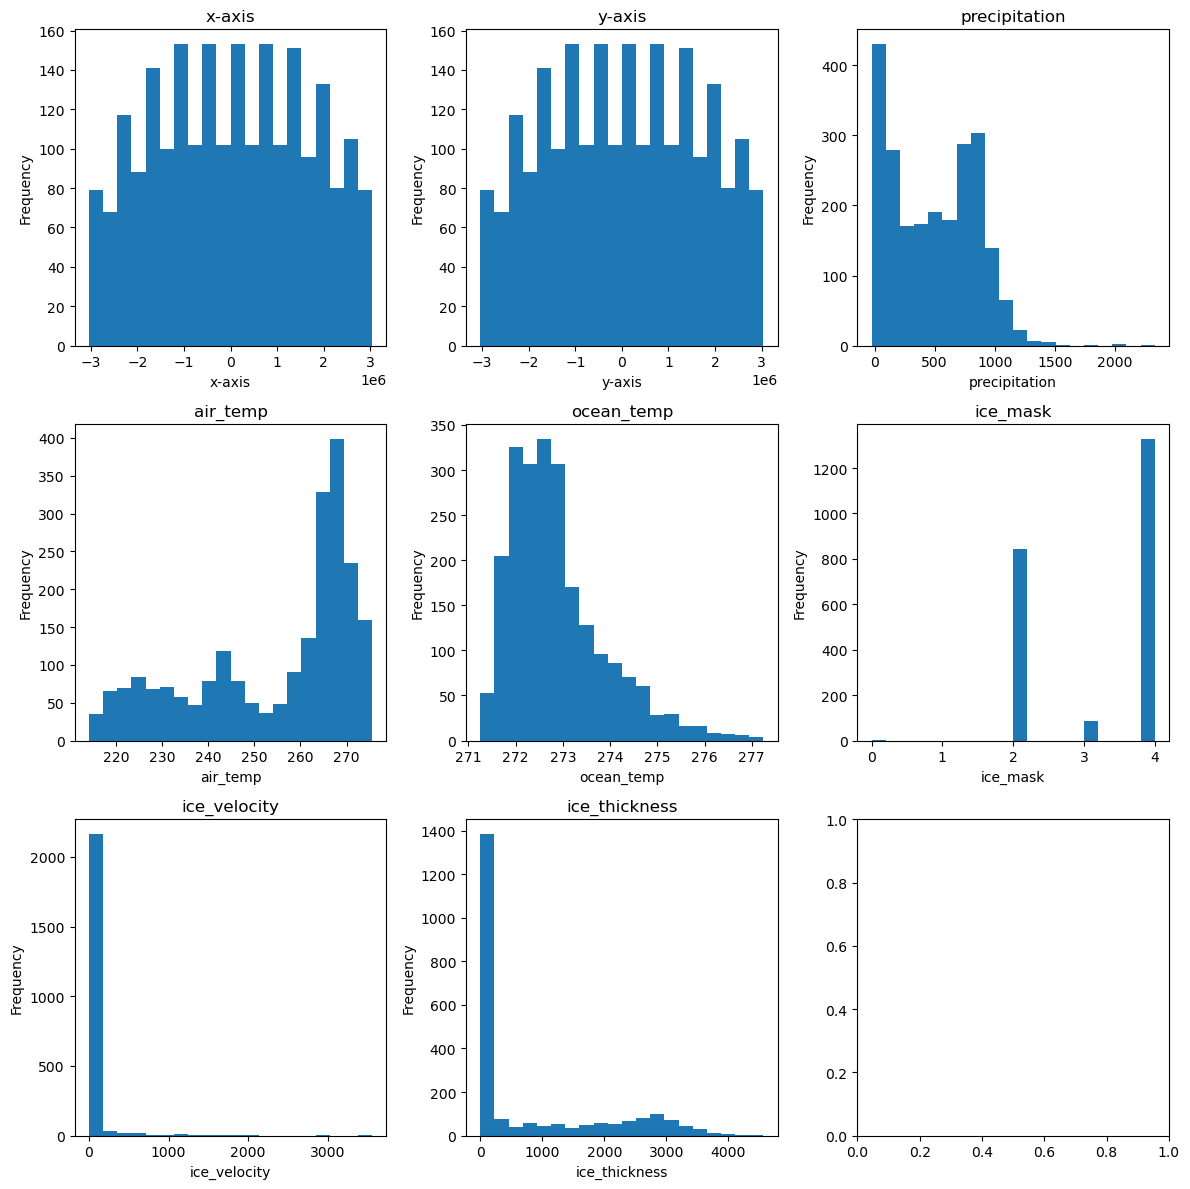

In [9]:
#distributions 

import matplotlib.pyplot as plt

def plot_attribute_distributions(df):
    attributes = df.columns  # List of all column names in the DataFrame
    n_attributes = len(attributes)
    
    # Calculate the number of rows needed for three columns
    nrows = (n_attributes + 1) // 3
    
    # Set up the matplotlib figure with two columns
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(12, nrows * 4))
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    for i, attribute in enumerate(attributes):
        # Plotting the histogram for each attribute
        df[attribute].plot(kind='hist', bins=20, ax=axes[i])
        axes[i].set_title(f'{attribute}')
        axes[i].set_xlabel(attribute)
        axes[i].set_ylabel('Frequency')

    # Hide any unused subplots
    for j in range(i + 1, nrows * 2):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_attribute_distributions(full_df)



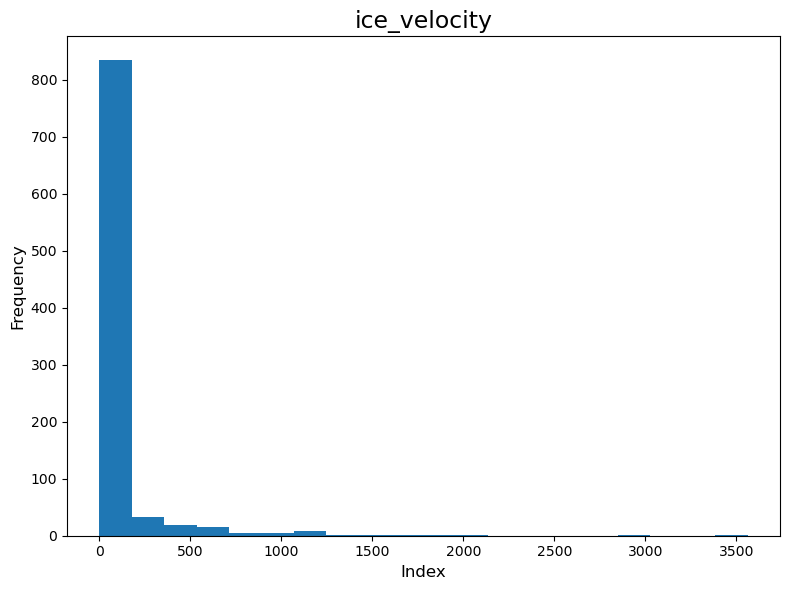

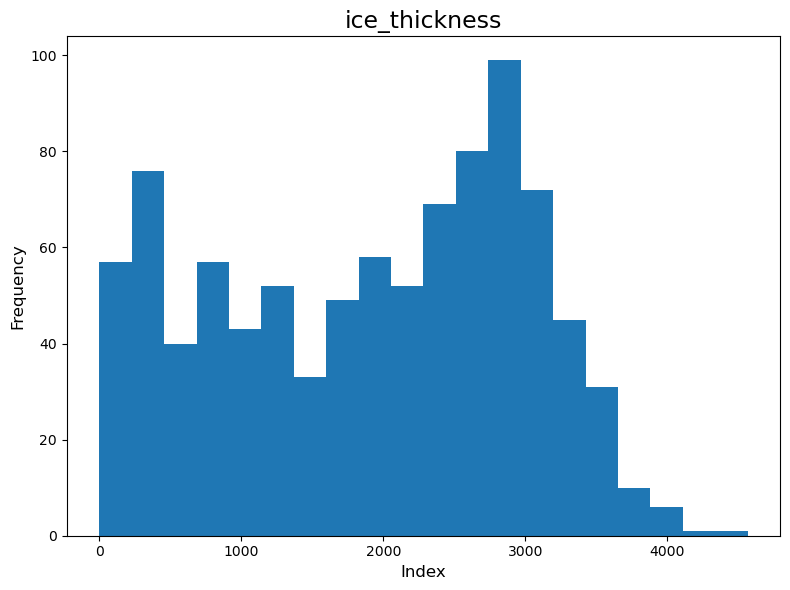

In [44]:
#distributions of ice velocity and thickness without areas of no ice 

ice_velocity = full_df[full_df['ice_velocity']>-1]
ice_velocity = ice_velocity[['ice_velocity']]

ice_thickness = full_df[full_df['ice_thickness']>0.0]
ice_thickness = ice_thickness[['ice_thickness']]

def plot_single_attribute(df):
    attribute = df.columns[0]  # Get the name of the single column
    
    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plotting the bar chart for the single attribute
    df[attribute].plot(kind='hist', ax=ax, bins = 20)
    ax.set_title(f'{attribute}',fontsize=17)
    ax.set_xlabel('Index', fontsize=12)  # Assuming the x-axis represents the index of the DataFrame
    ax.set_ylabel('Frequency', fontsize=12)
    
    plt.tight_layout()
    plt.show()

plot_single_attribute(ice_velocity)
plot_single_attribute(ice_thickness)


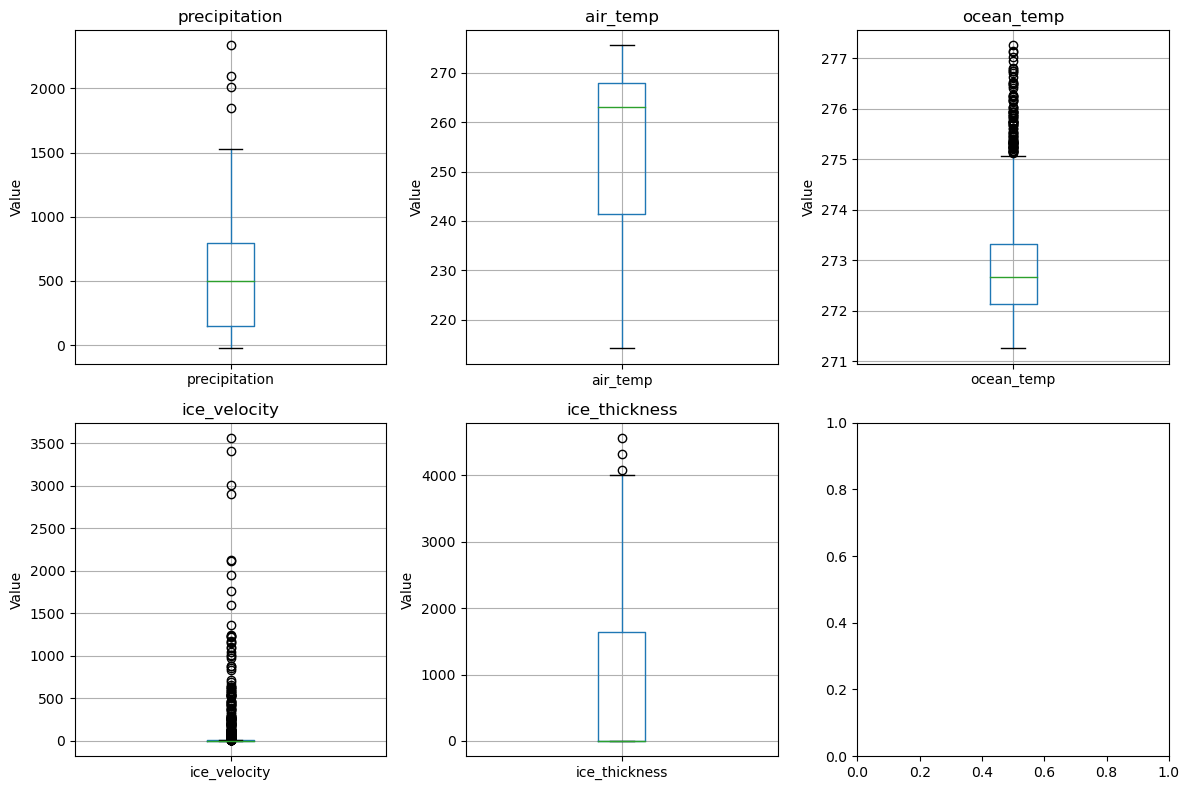

In [48]:
  
def plot_boxplots(df):
    # Exclude the last feature 'ice mask'
    features = df.columns
    n_features = len(features)
    
    # Calculate the number of rows needed for two columns
    nrows = (n_features + 1) // 3
    
    # Set up the matplotlib figure with two columns
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(12, nrows * 4))
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    for i, feature in enumerate(features):
        # Plotting the box plot for each feature
        df.boxplot(column=feature, ax=axes[i])
        axes[i].set_title(f'{feature}')
        axes[i].set_ylabel('Value')

    # Hide any unused subplots
    for j in range(i + 1, nrows * 2):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

boxplot_df = full_df.drop(columns = ['x-axis', 'y-axis', 'ice_mask'], inplace = False)
plot_boxplots(boxplot_df)

In [50]:
from scipy import stats

def calculate_trimmed_means(df, proportion_to_trim):

    trimmed_means = {}
    for attribute in df.columns:
        trimmed_mean = stats.trim_mean(df[attribute], proportion_to_trim)
        trimmed_means[attribute] = trimmed_mean

    return trimmed_means

print("++++++++++++ TRIMMED MEANS TO 10% ++++++++++++++")
trimmed_means = calculate_trimmed_means(full_df, 0.1)
print(trimmed_means)

print("++++++++++++ TRIMMED MEANS TO 20% ++++++++++++++")
trimmed_means = calculate_trimmed_means(full_df, 0.2)
print(trimmed_means)


++++++++++++ TRIMMED MEANS TO 10% ++++++++++++++
{'x-axis': 0.0, 'y-axis': 0.0, 'precipitation': 479.1805621655494, 'air_temp': 256.2350084466248, 'ocean_temp': 272.74811073054235, 'ice_mask': 3.265633646928611, 'ice_velocity': 2.2372739417355167, 'ice_thickness': 582.6171271560089}
++++++++++++ TRIMMED MEANS TO 20% ++++++++++++++
{'x-axis': 0.0, 'y-axis': 0.0, 'precipitation': 482.701683410431, 'air_temp': 258.2687667452568, 'ocean_temp': 272.687329484445, 'ice_mask': 3.3542435424354244, 'ice_velocity': 0.4291968649256521, 'ice_thickness': 357.2346855118438}


In [54]:
import numpy as np
def calculate_metrics_separate_dataframes(df, proportion_to_trim=0.1):

    # Initialize lists to store data for untrimmed and trimmed metrics
    attributes, untrimmed_ranges, untrimmed_variances, untrimmed_std_devs = [], [], [], []
    trimmed_ranges, trimmed_variances, trimmed_std_devs = [], [], []

    for attribute in df.columns:
        data = df[attribute]
        trimmed_data = stats.trimboth(data, proportion_to_trim)

        # Untrimmed metrics
        attributes.append(attribute)
        untrimmed_ranges.append(np.ptp(data))
        untrimmed_variances.append(np.var(data, ddof=1)) 
        untrimmed_std_devs.append(np.std(data, ddof=1)) 

        # Trimmed metrics
        trimmed_ranges.append(np.ptp(trimmed_data))
        trimmed_variances.append(np.var(trimmed_data, ddof=1))
        trimmed_std_devs.append(np.std(trimmed_data, ddof=1))

    # Creating the DataFrames
    untrimmed_metrics_df = pd.DataFrame({
        'Attribute': attributes,
        'Range': untrimmed_ranges,
        'Variance': untrimmed_variances,
        'Standard Deviation': untrimmed_std_devs
    })

    trimmed_metrics_df = pd.DataFrame({
        'Attribute': attributes,
        'Range': trimmed_ranges,
        'Variance': trimmed_variances,
        'Standard Deviation': trimmed_std_devs
    })

    return untrimmed_metrics_df, trimmed_metrics_df

# Example usage
untrimmed_metrics_df, trimmed_metrics_df = calculate_metrics_separate_dataframes(full_df)

print("+++++++++++ UNTRIMMED METRICS BELOW ++++++++++++")
print(untrimmed_metrics_df)
print('\n')
print("+++++++++++ TRIMMED METRICS BELOW ++++++++++++")
print(trimmed_metrics_df)


+++++++++++ UNTRIMMED METRICS BELOW ++++++++++++
       Attribute         Range      Variance  Standard Deviation
0         x-axis  6.080000e+06  2.664530e+12        1.632339e+06
1         y-axis  6.080000e+06  2.664530e+12        1.632339e+06
2  precipitation  2.360132e+03  1.238665e+05        3.519468e+02
3       air_temp  6.136826e+01  3.038605e+02        1.743159e+01
4     ocean_temp  5.999146e+00  1.029874e+00        1.014827e+00
5       ice_mask  4.000000e+00  9.253599e-01        9.619563e-01
6   ice_velocity  3.562592e+03  4.051055e+04        2.012723e+02
7  ice_thickness  4.563850e+03  1.357933e+06        1.165304e+03


+++++++++++ TRIMMED METRICS BELOW ++++++++++++
       Attribute         Range      Variance  Standard Deviation
0         x-axis  4.377600e+06  1.589400e+12        1.260714e+06
1         y-axis  4.377600e+06  1.589400e+12        1.260714e+06
2  precipitation  8.871732e+02  8.167291e+04        2.857847e+02
3       air_temp  4.628976e+01  1.893425e+02        1.376

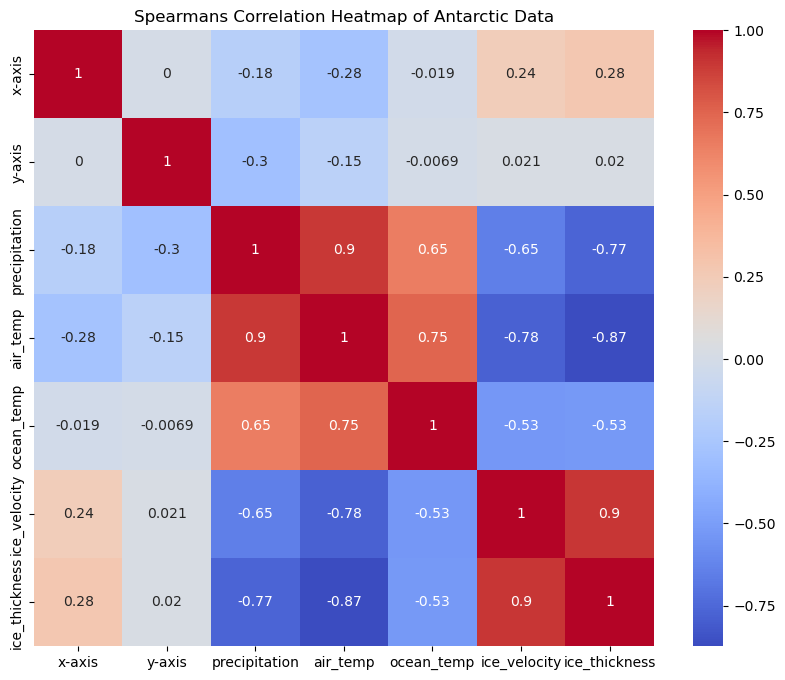

In [73]:
## CORRELATION HEATMAP -> Spearmans
import seaborn as sns

continuous_df = full_df.drop(columns=['ice_mask'], inplace = False)  # Drop the categorical column

# Calculate the correlation matrix -> use method = 'spearman', or method = "kendall"
corr_matrix = continuous_df.corr(method = 'spearman')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Spearmans Correlation Heatmap of Antarctic Data')
plt.show()

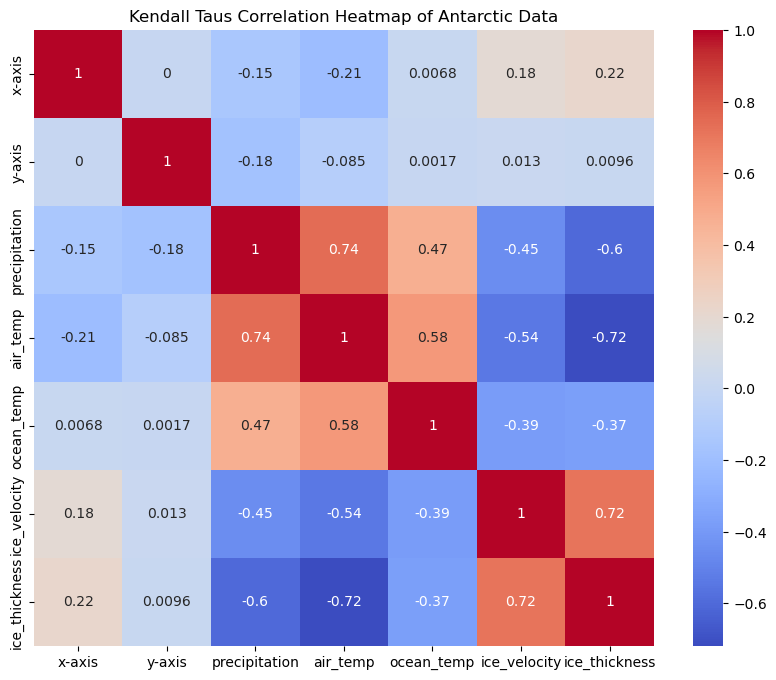

In [74]:
## CORRELATION HEATMAP -> Kendall Taus

continuous_df = full_df.drop(columns=['ice_mask'], inplace = False)  # Drop the categorical column

# Calculate the correlation matrix -> use method = 'spearman', or method = "kendall"
corr_matrix = continuous_df.corr(method = 'kendall')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Kendall Taus Correlation Heatmap of Antarctic Data')
plt.show()

In [63]:
#separating out outliers in the ice mask variable 

mask_df = full_df[full_df['ice_mask']!= 4]
mask_df = mask_df[mask_df['ice_mask']!= 3]
mask_df = mask_df[mask_df['ice_mask']!= 2]

print(mask_df)

      x-axis   y-axis  precipitation    air_temp  ocean_temp  ice_mask  \
497 -2432000  1459200     309.520203  262.914520  273.119110         0   
943  2310400   486400     156.836685  259.327209  272.645477         0   

     ice_velocity  ice_thickness  
497          -1.0       0.004753  
943          -1.0       0.000241  


In [88]:
#since we know the two outliers/incorrect targets are both 0, I will delete the rows accordingly 
ice_mask = full_df.drop(columns = ['x-axis', 'y-axis'], inplace = False)
ice_mask = ice_mask[ice_mask['ice_mask']!=0]

#can now do some analysis on each category 

grounded_ice = ice_mask[ice_mask['ice_mask'] == 2].copy()
grounded_ice.drop(columns = ['ice_mask'], inplace = True)
floating_ice = ice_mask[ice_mask['ice_mask'] == 3].copy()
floating_ice.drop(columns = ['ice_mask'], inplace = True)
open_ocean = ice_mask[ice_mask['ice_mask'] == 4].copy()
open_ocean.drop(columns = ['ice_mask'], inplace = True)

print("grounded ice:")
print(grounded_ice.describe())

grounded ice:
       precipitation    air_temp  ocean_temp  ice_velocity  ice_thickness
count     844.000000  844.000000  844.000000    844.000000     844.000000
mean      191.331420  234.940939  272.279628     48.032727    2055.660503
std       270.748128   11.786791    0.503733    227.533123    1011.773599
min       -26.345100  214.175415  271.297577      0.000000       1.479372
25%        37.822948  224.678150  271.915398      2.196384    1231.778687
50%        90.779663  234.403671  272.174835      6.403733    2239.159546
75%       212.424507  244.352627  272.616768     19.404735    2874.668823
max      2333.787109  266.270020  274.844666   3006.586426    4563.849609


In [89]:
print("floating ice:")
print(floating_ice.describe())

floating ice:
       precipitation    air_temp  ocean_temp  ice_velocity  ice_thickness
count      85.000000   85.000000   85.000000     85.000000      85.000000
mean      277.740004  247.108146  271.927351    484.774101     457.746579
std       257.746020    6.580246    0.542664    584.418766     351.509503
min        35.111038  239.800919  271.249695      3.151653      35.666943
25%       150.058350  242.287659  271.598999    156.430069     249.241241
50%       183.907974  244.056168  271.831787    296.031555     338.751648
75%       254.268616  250.595932  272.122681    574.336914     520.083252
max      1529.742310  263.922668  274.150208   3561.592041    2165.036377


In [90]:
print("open ocean:")
print(open_ocean.describe())

open ocean:
       precipitation     air_temp   ocean_temp  ice_velocity  ice_thickness
count    1326.000000  1326.000000  1326.000000        1326.0         1326.0
mean      698.943443   267.215505   273.309355          -1.0            0.0
std       237.812288     4.146041     1.049344           0.0            0.0
min        72.892464   251.302094   271.427673          -1.0            0.0
25%       521.099731   264.815559   272.586060          -1.0            0.0
50%       746.732727   267.356384   273.034134          -1.0            0.0
75%       853.530899   270.134598   273.938400          -1.0            0.0
max      1849.135620   275.543671   277.248840          -1.0            0.0


/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


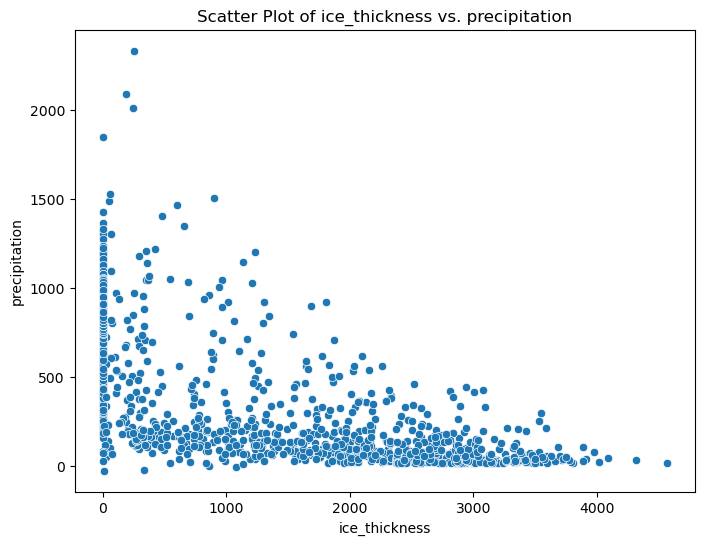

/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


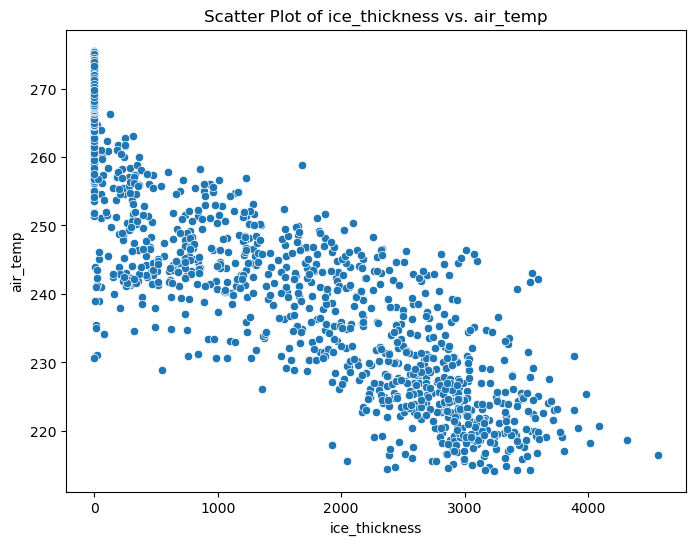

/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


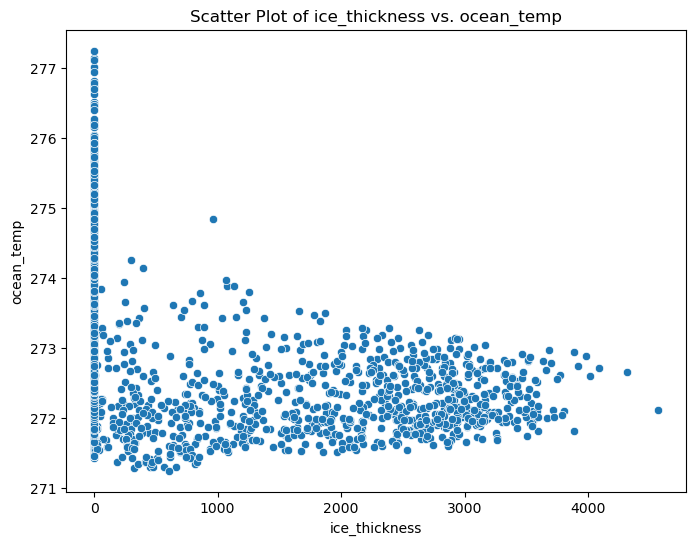

/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


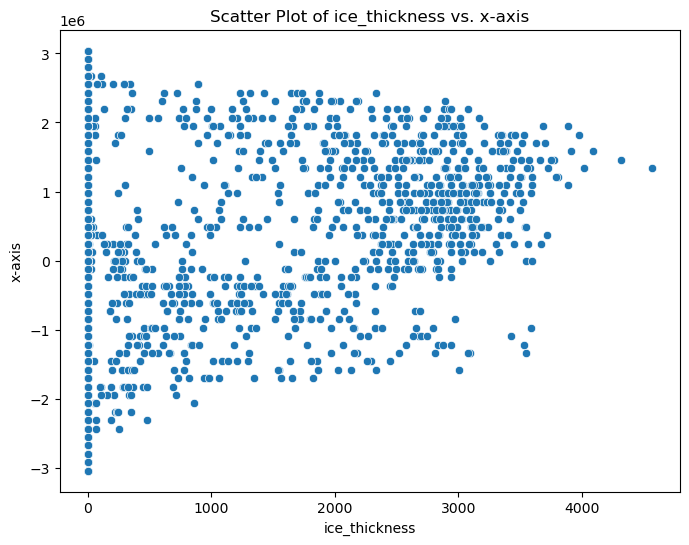

/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


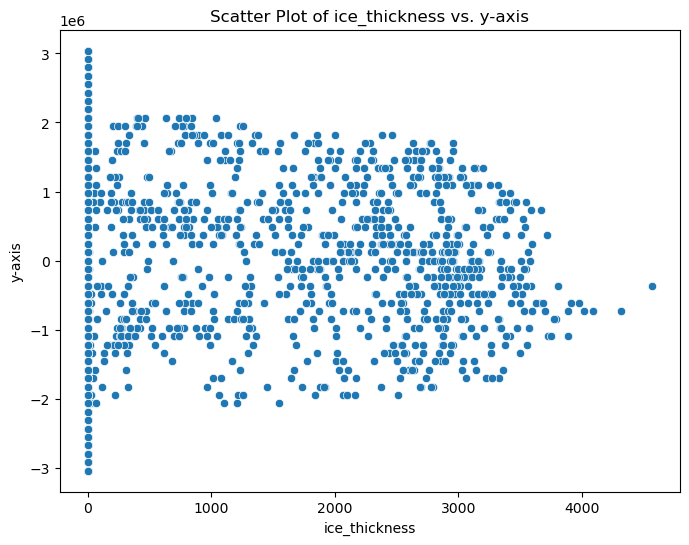

In [93]:
#SCATTER PLOTS -> ice thickness

features = ["precipitation", "air_temp", "ocean_temp", "x-axis", "y-axis"]  
target = "ice_thickness"


for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=full_df[target], y=full_df[feature])
    plt.title(f"Scatter Plot of {target} vs. {feature}")
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()

/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


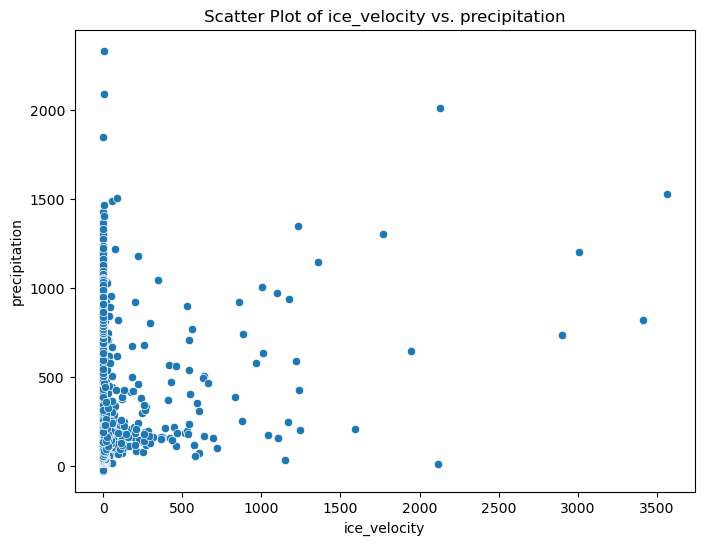

/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


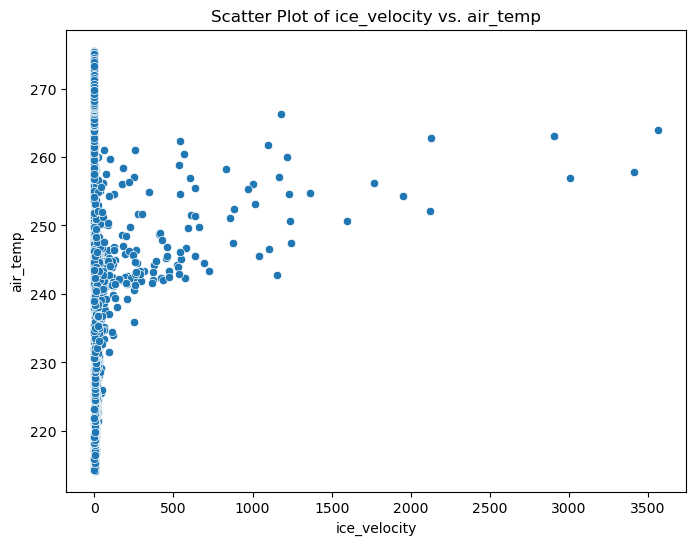

/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


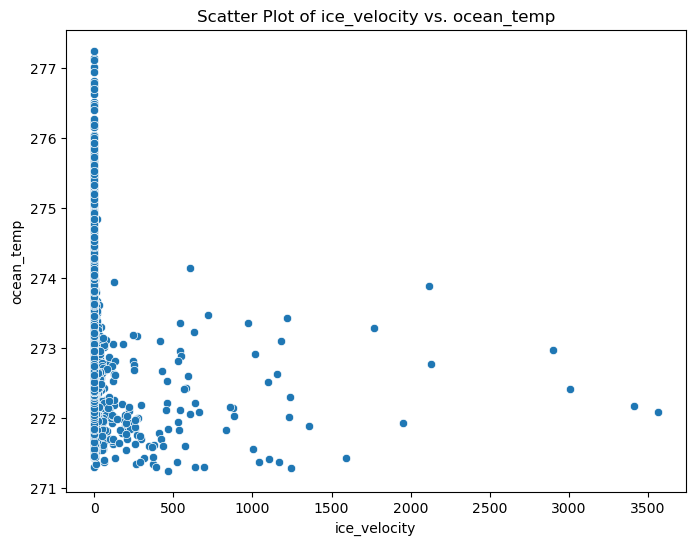

/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


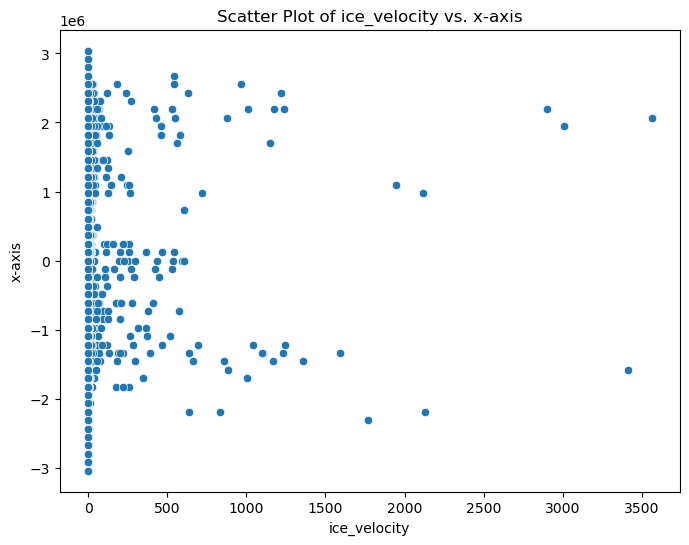

/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


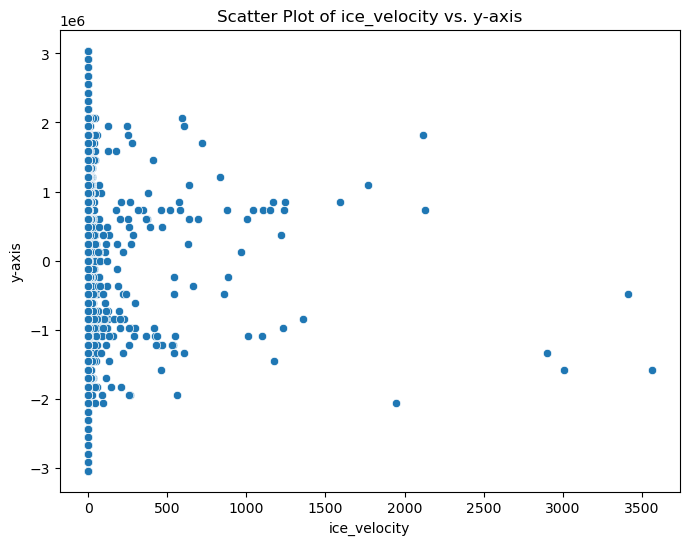

In [94]:
#SCATTER PLOTS -> ice velocity

features = ["precipitation", "air_temp", "ocean_temp", "x-axis", "y-axis"]  
target = "ice_velocity"


for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=full_df[target], y=full_df[feature])
    plt.title(f"Scatter Plot of {target} vs. {feature}")
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()